In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

In [4]:
import numpy as np

In [5]:
import torch

In [6]:
import gym

In [7]:
import time

In [8]:
from gym.envs.registration import register
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
    max_episode_steps=100,
    reward_threshold=0.78, # optimum = .8196
)

In [59]:
#env = gym.make('FrozenLakeNotSlippery-v0')
#env = gym.make('FrozenLake-v0')
env = gym.make('Taxi-v3')

In [60]:
number_of_states=env.observation_space.n
number_of_actions=env.action_space.n

In [61]:
Q=torch.zeros([number_of_states,number_of_actions])

In [62]:
gamma=0.95

In [63]:
learning_rate=0.9

In [64]:
egreedy=0.9
egreedy_final=0.01
egreedy_decay=0.999

In [65]:
%%time

x_e = []
y_e = []

for i in [0.9, 0.7, 0.5, 0.3, 0.1]:
    num_episodes=1000
    Q=torch.zeros([number_of_states,number_of_actions])
    #learning_rate=i
    egreedy=i
    steps_total=np.full([num_episodes],-999,dtype=np.int32)
    rewards_total=np.full([num_episodes],-999,dtype=np.float32)

    for i_episode in range(num_episodes):

        state = env.reset()
        #for step in range(100):
        step=0
        #print("____INITIAL STATE____")
        #env.render()
        #print("^^^^^^^^^^^^^^^^^^^^^")

        #undiscounted reward for the episode
        current_total_reward=0
        while True:

            step+=1

            #action=env.action_space.sample()
            Q_eps=1e-6*torch.randn([number_of_actions])
            random_for_egreedy=torch.rand(1).item()

            if random_for_egreedy>egreedy:
                action=torch.argmax(Q[state]+Q_eps).item()
            else:
                action=env.action_space.sample()

            new_state, reward, done, info = env.step(action)

            current_total_reward+=reward

            if egreedy>egreedy_final:
                egreedy*=egreedy_decay

            Q[state,action]=(1.0-learning_rate)*Q[state,action]+learning_rate*(reward+gamma *torch.max(Q[new_state]).item())

            state=new_state

            #time.sleep(0.4)
            #print("------------------------")
            #env.render() 
            #print("++++++++++++++++++++++++")
            #print('new state: ',new_state)
            #print('info: ', info)

            #show_state(env.env,i_episode,step)

            if done:
                steps_total[i_episode]=step
                rewards_total[i_episode]=current_total_reward
                print("Episode finished after: {}".format(step))
                break
    x_e.append(torch.arange(len(rewards_total)))
    y_e.append(rewards_total)

Episode finished after: 186
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 136
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 156
Episode finished after: 53
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 138
Episode finished after: 139
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 86
Episode finished after: 200
Episode finished after: 62
Episode finished after: 200
Episode finished after:

Episode finished after: 11
Episode finished after: 15
Episode finished after: 21
Episode finished after: 14
Episode finished after: 18
Episode finished after: 29
Episode finished after: 13
Episode finished after: 14
Episode finished after: 10
Episode finished after: 15
Episode finished after: 14
Episode finished after: 10
Episode finished after: 11
Episode finished after: 18
Episode finished after: 10
Episode finished after: 18
Episode finished after: 17
Episode finished after: 14
Episode finished after: 16
Episode finished after: 10
Episode finished after: 16
Episode finished after: 13
Episode finished after: 10
Episode finished after: 10
Episode finished after: 16
Episode finished after: 12
Episode finished after: 12
Episode finished after: 6
Episode finished after: 11
Episode finished after: 12
Episode finished after: 13
Episode finished after: 8
Episode finished after: 16
Episode finished after: 18
Episode finished after: 16
Episode finished after: 21
Episode finished after: 9
Epis

Episode finished after: 12
Episode finished after: 15
Episode finished after: 14
Episode finished after: 14
Episode finished after: 14
Episode finished after: 13
Episode finished after: 9
Episode finished after: 9
Episode finished after: 16
Episode finished after: 10
Episode finished after: 15
Episode finished after: 12
Episode finished after: 13
Episode finished after: 14
Episode finished after: 8
Episode finished after: 17
Episode finished after: 17
Episode finished after: 12
Episode finished after: 11
Episode finished after: 16
Episode finished after: 12
Episode finished after: 10
Episode finished after: 13
Episode finished after: 15
Episode finished after: 15
Episode finished after: 14
Episode finished after: 10
Episode finished after: 15
Episode finished after: 13
Episode finished after: 16
Episode finished after: 19
Episode finished after: 7
Episode finished after: 14
Episode finished after: 18
Episode finished after: 16
Episode finished after: 16
Episode finished after: 15
Episo

Episode finished after: 200
Episode finished after: 124
Episode finished after: 84
Episode finished after: 91
Episode finished after: 155
Episode finished after: 199
Episode finished after: 168
Episode finished after: 154
Episode finished after: 200
Episode finished after: 12
Episode finished after: 108
Episode finished after: 170
Episode finished after: 26
Episode finished after: 150
Episode finished after: 131
Episode finished after: 12
Episode finished after: 19
Episode finished after: 92
Episode finished after: 200
Episode finished after: 27
Episode finished after: 98
Episode finished after: 30
Episode finished after: 102
Episode finished after: 7
Episode finished after: 159
Episode finished after: 11
Episode finished after: 69
Episode finished after: 20
Episode finished after: 62
Episode finished after: 23
Episode finished after: 95
Episode finished after: 13
Episode finished after: 200
Episode finished after: 164
Episode finished after: 200
Episode finished after: 200
Episode fin

Episode finished after: 14
Episode finished after: 10
Episode finished after: 21
Episode finished after: 16
Episode finished after: 14
Episode finished after: 12
Episode finished after: 14
Episode finished after: 15
Episode finished after: 18
Episode finished after: 14
Episode finished after: 13
Episode finished after: 14
Episode finished after: 13
Episode finished after: 14
Episode finished after: 15
Episode finished after: 14
Episode finished after: 16
Episode finished after: 15
Episode finished after: 13
Episode finished after: 9
Episode finished after: 15
Episode finished after: 9
Episode finished after: 16
Episode finished after: 13
Episode finished after: 8
Episode finished after: 21
Episode finished after: 8
Episode finished after: 12
Episode finished after: 14
Episode finished after: 10
Episode finished after: 12
Episode finished after: 13
Episode finished after: 14
Episode finished after: 14
Episode finished after: 17
Episode finished after: 17
Episode finished after: 12
Episo

Episode finished after: 12
Episode finished after: 13
Episode finished after: 11
Episode finished after: 12
Episode finished after: 27
Episode finished after: 16
Episode finished after: 10
Episode finished after: 13
Episode finished after: 10
Episode finished after: 12
Episode finished after: 11
Episode finished after: 16
Episode finished after: 15
Episode finished after: 15
Episode finished after: 10
Episode finished after: 17
Episode finished after: 23
Episode finished after: 8
Episode finished after: 14
Episode finished after: 13
Episode finished after: 15
Episode finished after: 12
Episode finished after: 15
Episode finished after: 13
Episode finished after: 11
Episode finished after: 13
Episode finished after: 9
Episode finished after: 12
Episode finished after: 13
Episode finished after: 14
Episode finished after: 13
Episode finished after: 10
Episode finished after: 11
Episode finished after: 11
Episode finished after: 12
Episode finished after: 15
Episode finished after: 11
Epi

Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 126
Episode finished after: 73
Episode finished after: 57
Episode finished after: 104
Episode finished after: 130
Episode finished after: 146
Episode finished after: 200
Episode finished after: 13
Episode finished after: 200
Episode finished after: 102
Episode finished after: 200
Episode finished after: 200
Episode finished after: 196
Episode finished after: 155
Episode finished after: 200
Episode finished after: 31
Episode finished after: 92
Episode finished after: 200
Episode finished after: 116
Episode finished after: 197
Episode finished after: 107
Episode finished after: 69
Episode finished after: 101
Episode finished after: 29
Episode finished after: 200
Episode finished after: 107
Episode finished after: 146
Episode finished after: 35
Episode finished after: 29
Episode finished after: 23
Episode finished after: 187
Episode finished after: 121
Episode finished after: 31
Epi

Episode finished after: 16
Episode finished after: 10
Episode finished after: 12
Episode finished after: 20
Episode finished after: 14
Episode finished after: 11
Episode finished after: 14
Episode finished after: 20
Episode finished after: 12
Episode finished after: 11
Episode finished after: 18
Episode finished after: 14
Episode finished after: 8
Episode finished after: 6
Episode finished after: 9
Episode finished after: 10
Episode finished after: 10
Episode finished after: 19
Episode finished after: 23
Episode finished after: 22
Episode finished after: 12
Episode finished after: 9
Episode finished after: 13
Episode finished after: 11
Episode finished after: 13
Episode finished after: 14
Episode finished after: 13
Episode finished after: 8
Episode finished after: 19
Episode finished after: 15
Episode finished after: 28
Episode finished after: 13
Episode finished after: 12
Episode finished after: 9
Episode finished after: 25
Episode finished after: 15
Episode finished after: 25
Episode

Episode finished after: 16
Episode finished after: 13
Episode finished after: 13
Episode finished after: 10
Episode finished after: 17
Episode finished after: 11
Episode finished after: 15
Episode finished after: 17
Episode finished after: 15
Episode finished after: 11
Episode finished after: 19
Episode finished after: 11
Episode finished after: 11
Episode finished after: 15
Episode finished after: 7
Episode finished after: 11
Episode finished after: 16
Episode finished after: 7
Episode finished after: 15
Episode finished after: 11
Episode finished after: 9
Episode finished after: 15
Episode finished after: 14
Episode finished after: 11
Episode finished after: 13
Episode finished after: 11
Episode finished after: 16
Episode finished after: 15
Episode finished after: 10
Episode finished after: 14
Episode finished after: 16
Episode finished after: 12
Episode finished after: 15
Episode finished after: 11
Episode finished after: 17
Episode finished after: 15
Episode finished after: 12
Epis

Episode finished after: 49
Episode finished after: 96
Episode finished after: 71
Episode finished after: 98
Episode finished after: 125
Episode finished after: 58
Episode finished after: 190
Episode finished after: 185
Episode finished after: 200
Episode finished after: 116
Episode finished after: 192
Episode finished after: 19
Episode finished after: 122
Episode finished after: 116
Episode finished after: 43
Episode finished after: 34
Episode finished after: 29
Episode finished after: 21
Episode finished after: 94
Episode finished after: 42
Episode finished after: 115
Episode finished after: 33
Episode finished after: 95
Episode finished after: 12
Episode finished after: 58
Episode finished after: 109
Episode finished after: 81
Episode finished after: 61
Episode finished after: 12
Episode finished after: 19
Episode finished after: 16
Episode finished after: 68
Episode finished after: 67
Episode finished after: 47
Episode finished after: 54
Episode finished after: 59
Episode finished a

Episode finished after: 40
Episode finished after: 9
Episode finished after: 16
Episode finished after: 16
Episode finished after: 14
Episode finished after: 15
Episode finished after: 15
Episode finished after: 15
Episode finished after: 17
Episode finished after: 17
Episode finished after: 13
Episode finished after: 17
Episode finished after: 9
Episode finished after: 16
Episode finished after: 13
Episode finished after: 10
Episode finished after: 23
Episode finished after: 16
Episode finished after: 15
Episode finished after: 13
Episode finished after: 17
Episode finished after: 12
Episode finished after: 14
Episode finished after: 23
Episode finished after: 20
Episode finished after: 13
Episode finished after: 8
Episode finished after: 21
Episode finished after: 13
Episode finished after: 15
Episode finished after: 16
Episode finished after: 10
Episode finished after: 15
Episode finished after: 18
Episode finished after: 16
Episode finished after: 22
Episode finished after: 22
Epis

Episode finished after: 14
Episode finished after: 15
Episode finished after: 10
Episode finished after: 19
Episode finished after: 12
Episode finished after: 15
Episode finished after: 14
Episode finished after: 14
Episode finished after: 12
Episode finished after: 9
Episode finished after: 13
Episode finished after: 11
Episode finished after: 10
Episode finished after: 12
Episode finished after: 11
Episode finished after: 10
Episode finished after: 14
Episode finished after: 12
Episode finished after: 18
Episode finished after: 12
Episode finished after: 12
Episode finished after: 12
Episode finished after: 15
Episode finished after: 18
Episode finished after: 9
Episode finished after: 11
Episode finished after: 12
Episode finished after: 16
Episode finished after: 15
Episode finished after: 12
Episode finished after: 11
Episode finished after: 11
Episode finished after: 17
Episode finished after: 17
Episode finished after: 11
Episode finished after: 12
Episode finished after: 12
Epi

Episode finished after: 23
Episode finished after: 102
Episode finished after: 79
Episode finished after: 81
Episode finished after: 137
Episode finished after: 15
Episode finished after: 121
Episode finished after: 37
Episode finished after: 10
Episode finished after: 32
Episode finished after: 12
Episode finished after: 26
Episode finished after: 119
Episode finished after: 63
Episode finished after: 99
Episode finished after: 11
Episode finished after: 11
Episode finished after: 13
Episode finished after: 23
Episode finished after: 15
Episode finished after: 198
Episode finished after: 25
Episode finished after: 41
Episode finished after: 111
Episode finished after: 60
Episode finished after: 56
Episode finished after: 13
Episode finished after: 55
Episode finished after: 49
Episode finished after: 40
Episode finished after: 25
Episode finished after: 29
Episode finished after: 25
Episode finished after: 30
Episode finished after: 76
Episode finished after: 11
Episode finished after

Episode finished after: 13
Episode finished after: 13
Episode finished after: 22
Episode finished after: 14
Episode finished after: 17
Episode finished after: 9
Episode finished after: 9
Episode finished after: 15
Episode finished after: 15
Episode finished after: 8
Episode finished after: 10
Episode finished after: 17
Episode finished after: 15
Episode finished after: 14
Episode finished after: 12
Episode finished after: 13
Episode finished after: 15
Episode finished after: 15
Episode finished after: 14
Episode finished after: 12
Episode finished after: 31
Episode finished after: 13
Episode finished after: 10
Episode finished after: 18
Episode finished after: 12
Episode finished after: 13
Episode finished after: 9
Episode finished after: 14
Episode finished after: 18
Episode finished after: 18
Episode finished after: 12
Episode finished after: 11
Episode finished after: 13
Episode finished after: 13
Episode finished after: 8
Episode finished after: 14
Episode finished after: 14
Episod

Episode finished after: 14
Episode finished after: 13
Episode finished after: 16
Episode finished after: 17
Episode finished after: 12
Episode finished after: 16
Episode finished after: 13
Episode finished after: 15
Episode finished after: 17
Episode finished after: 9
Episode finished after: 12
Episode finished after: 14
Episode finished after: 14
Episode finished after: 16
Episode finished after: 15
Episode finished after: 12
Episode finished after: 12
Episode finished after: 15
Episode finished after: 17
Episode finished after: 9
Episode finished after: 10
Episode finished after: 12
Episode finished after: 15
Episode finished after: 14
Episode finished after: 12
Episode finished after: 13
Episode finished after: 17
Episode finished after: 13
Episode finished after: 16
Episode finished after: 13
Episode finished after: 10
Episode finished after: 14
Episode finished after: 12
Episode finished after: 14
Episode finished after: 11
Episode finished after: 13
Episode finished after: 9
Epis

In [14]:
print("Average number of steps: {}". format(np.average(steps_total)))

Average number of steps: 29.046


In [15]:
print("Average number of steps in last 100 episodes: {}". format(np.average(steps_total[-100:])))

Average number of steps in last 100 episodes: 13.48


In [16]:
print("Average total undiscounted reward {}".format(np.average(rewards_total)))

Average total undiscounted reward -18.804000854492188


In [17]:
print("Average total undiscounted reward in the last 100 episodes {}".format(np.average(rewards_total[-100:])))

Average total undiscounted reward in the last 100 episodes 6.980000019073486


In [18]:
print(Q)

tensor([[  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
        [ -5.7468,   2.9383,  -6.6676,  -6.1625,   5.2100,  -9.0000],
        [ -4.0418,  -4.1128,   6.5855,  -4.1128,  10.9512,  -9.0000],
        ...,
        [ -3.3642,  -2.7441,  -3.3642,  -3.3665, -10.6695,  -9.0000],
        [ -4.8277,  -4.8278,  -4.8277,  -4.2462,  -9.0000,  -9.0000],
        [ -1.7595,  -1.7595,  -1.7595,  14.4000,  -9.0000,  -9.0000]])


In [46]:
#print(rewards_total)
labels_lr = [0.2, 0.4, 0.6, 0.8]
labels_e = [0.9, 0.7, 0.5, 0.3, 0.1]

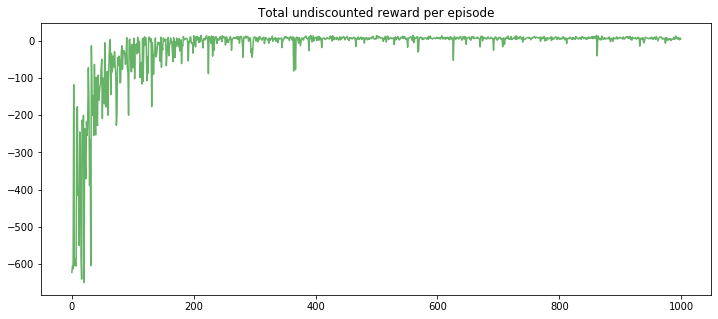

In [66]:
plt.figure(1,figsize=[12,5])
plt.title("Total undiscounted reward per episode")
plt.plot(torch.arange(len(rewards_total)), rewards_total,alpha=0.6, color='green')
#plt.plot(rewards_total)
plt.show()


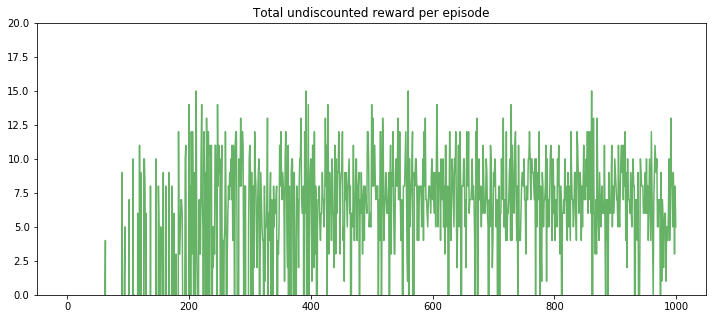

In [67]:
plt.figure(13,figsize=[12,5])
plt.title("Total undiscounted reward per episode")
plt.plot(torch.arange(len(rewards_total)), rewards_total,alpha=0.6, color='green')
#plt.plot(rewards_total)
plt.ylim(0.0,20.0)
plt.show()

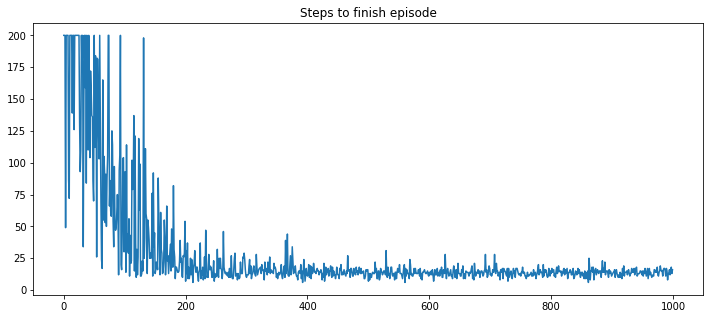

In [68]:
plt.figure(3,figsize=[12,5])
plt.title("Steps to finish episode")
plt.plot(steps_total)
plt.show()

In [69]:
print(Q)

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [-5.6760, -6.1625, -6.2575, -6.1625,  5.2100, -5.4455],
        [-4.1128, -4.1128, -3.6237, -4.1128, 10.9512, -9.0000],
        ...,
        [-2.5803, -2.7282, -2.5803, -3.2992, -9.0000, -9.0000],
        [-5.5105, -5.5105, -5.5105, -6.1600, -9.0000, -9.0000],
        [-0.9000, -0.9000, -0.9000, 17.9998,  3.7278, -9.0000]])


In [70]:
def moving_average(a, n=5) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

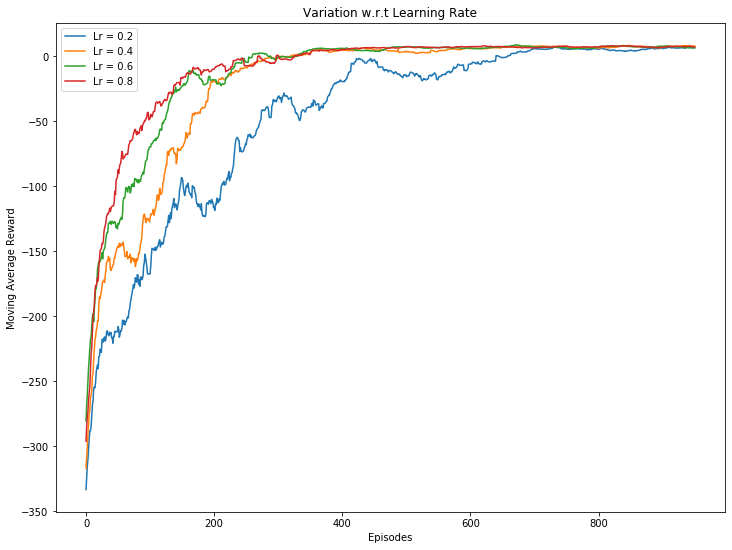

In [75]:
plt.figure(figsize=(12, 9))


for i, label in enumerate(labels_lr):
    plt.plot(x_lr[i][:-49], moving_average(y_lr[i], 50), label="Lr = "+str(label))
  


    
plt.xlabel("Episodes")
plt.ylabel("Moving Average Reward")
plt.title("Variation w.r.t Learning Rate")
#plt.xlim(0, 500)
#plt.ylim(-50, 50)
plt.legend()

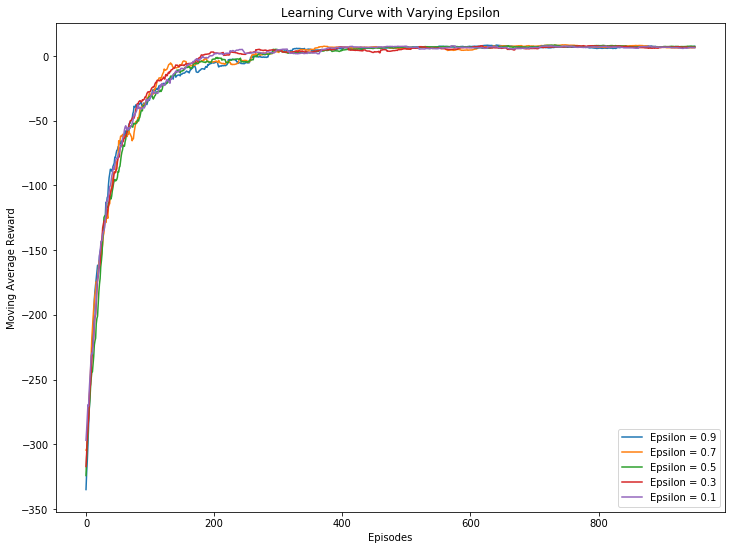

In [76]:
plt.figure(figsize=(12, 9))


for i, label in enumerate(labels_e):
    plt.plot(x_e[i][:-49], moving_average(y_e[i], 50), label="Epsilon = "+str(label))
    
    
plt.title("Learning Curve with Varying Epsilon")
plt.xlabel("Episodes")
plt.ylabel("Moving Average Reward")
#plt.xlim(0, 500)
#plt.ylim(-50, 50)
plt.legend()